In [1]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np

import severability

# Multiscale severability applied to SBM

Graph named 'stochastic_block_model' with 103 nodes and 571 edges


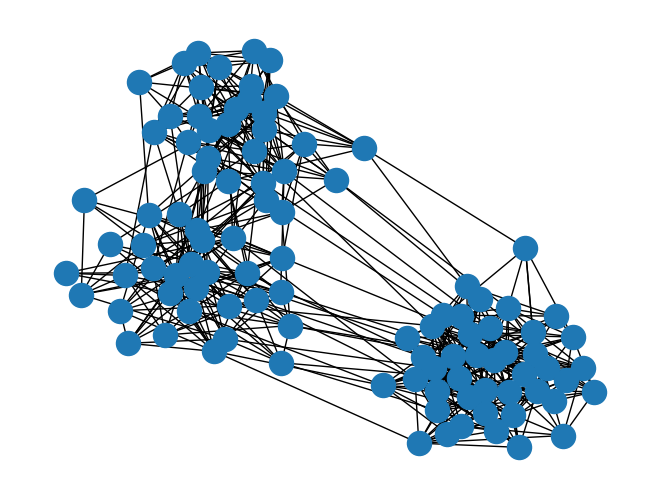

In [2]:
# get SBM graph
sizes = [30, 30, 43]
probs = [[0.3, 0.03, 0.01], [0.03, 0.3, 0.01], [0.01, 0.01, 0.3]]
G = nx.stochastic_block_model(sizes, probs, seed=0)
print(G)
nx.draw(G)

In [3]:
# get adjacency matrix
A = nx.to_numpy_array(G)

In [4]:
# run multiscale severability
sev_results = severability.multiscale_severability(A, t_max=10, n_tries=30, n_workers=7)

Optimise severability ...


100%|██████████| 10/10 [01:33<00:00,  9.38s/it]


Compute 1-Rand(t) ...


100%|██████████| 10/10 [00:00<00:00, 53.41it/s]

Compute 1-Rand(t,t') ...


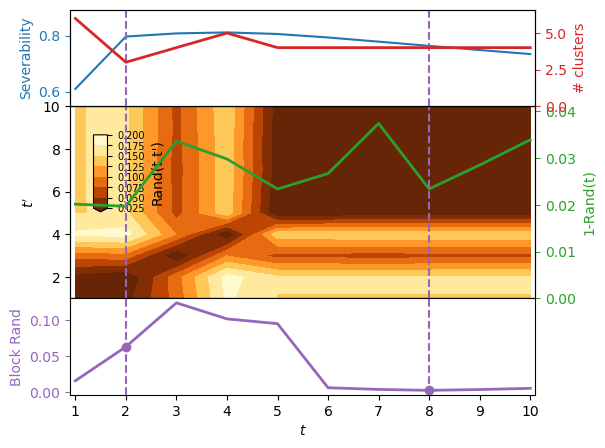

In [5]:
# plot severability results
sev_results = severability.identify_optimal_scales(sev_results, kernel_size=3)
severability.plotting.plot_scan(sev_results)

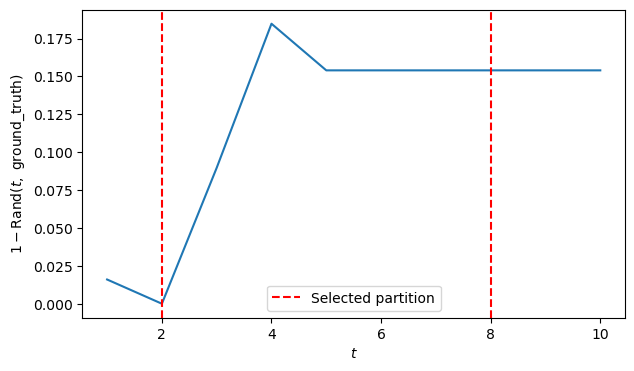

In [8]:
# store ground truth partition in severability format
ground_truth = [[(list(partition), 1) for partition in G.graph["partition"]]]

# compute 1-Rand[ground_truth, severability(t)]
rand_ground_truth = severability.compute_rand_ttprime(ground_truth+sev_results["partitions"], n_nodes=G.number_of_nodes())[:,0][1:]

# plot 
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(sev_results["scales"], rand_ground_truth)
ax.axvline(x=sev_results["selected_partitions"][0]+1, ls = "--", c="red", label="Selected partition")
for i in range(1, len(sev_results["selected_partitions"])):
    ax.axvline(x=sev_results["selected_partitions"][i]+1, ls = "--", c="red")
ax.set(xlabel=r"$t$", ylabel="$1-\mathrm{Rand}(t,$ ground_truth$)$")
ax.legend();

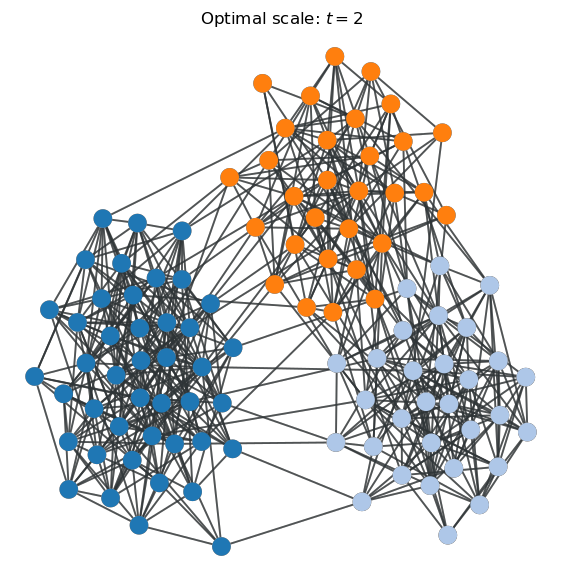

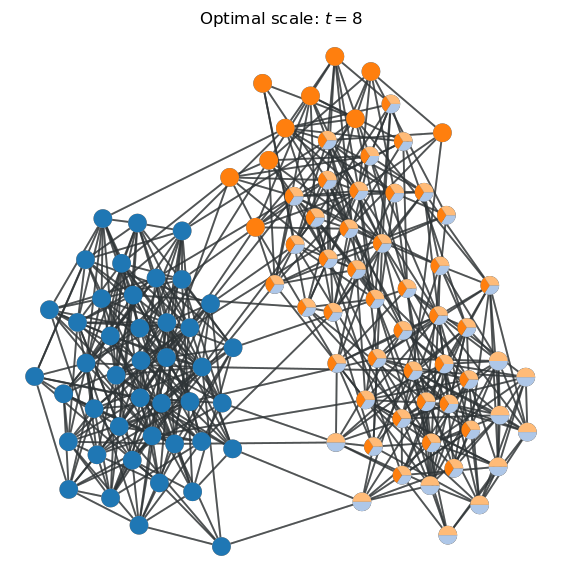

In [9]:
# create the pie chart graph visualisation
for i in sev_results["selected_partitions"]:
    severability.plot_pie_graph(sev_results['partitions'][i], A, title=f"Optimal scale: $t={sev_results['scales'][i]}$")